# Hotel Reservations Dataset
## Can you predict if customer is going to cancel the reservation ?
### About Dataset
### Context
###The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

### Can you predict if the customer is going to honor the reservation or cancel it ?


# Fase 1: Comprensión y exploración de los datos

In [21]:
import pandas as pd

In [22]:
# Load the CSV file (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?select=Hotel+Reservations.csv)
df = pd.read_csv('https://raw.githubusercontent.com/RaistS/Datasets/main/HotelReservations.csv')

# Let's check the shape of the DataFrame
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# And the data types of each column
df.dtypes


The dataset has 36275 rows and 19 columns.


Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [23]:
# Generate a statistical summary of the numerical columns
df.describe()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [24]:
# Check for null values
df.isnull().sum()


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [25]:
# Check the distribution of categorical variables
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

for col in categorical_cols:
    print(f"Distribution of {col}:")
    print(df[col].value_counts())
    print("\n" + "-" * 50 + "\n")


Distribution of type_of_meal_plan:
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

--------------------------------------------------

Distribution of room_type_reserved:
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

--------------------------------------------------

Distribution of market_segment_type:
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

--------------------------------------------------

Distribution of booking_status:
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

--------------------------------------------------



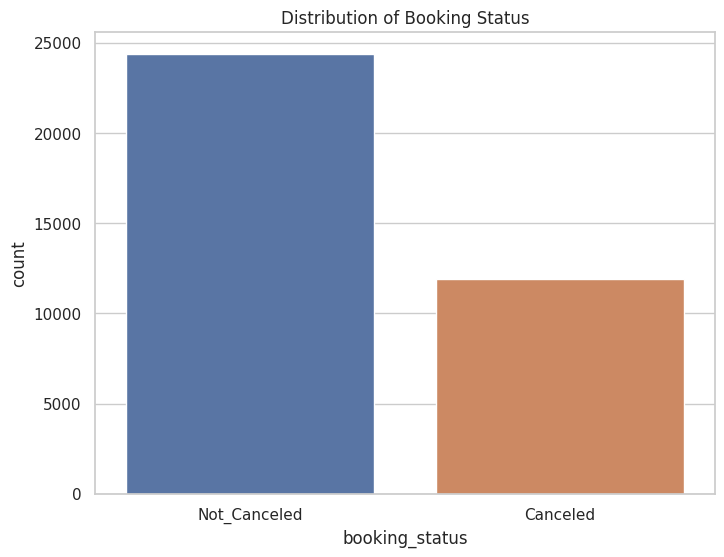

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='booking_status', data=df)
plt.title('Distribution of Booking Status')
plt.show()


# Fase 2: Visualización de los datos

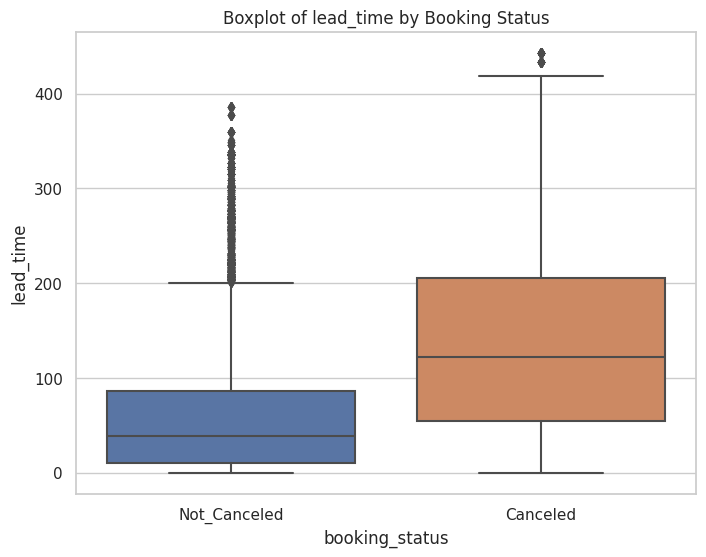

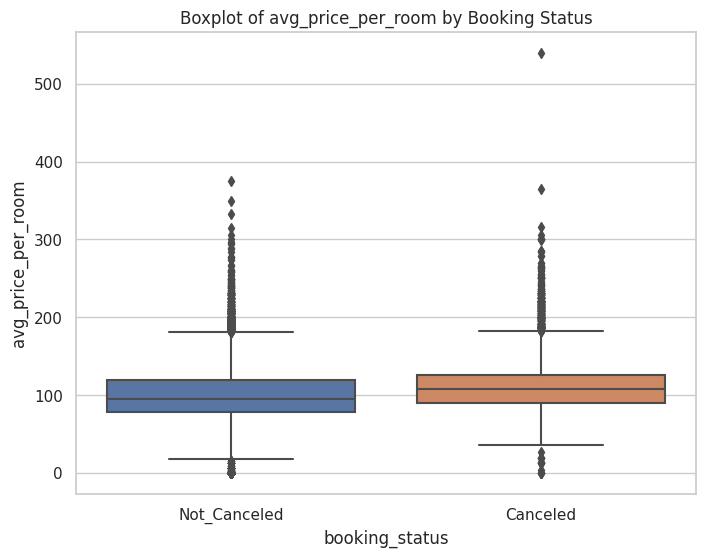

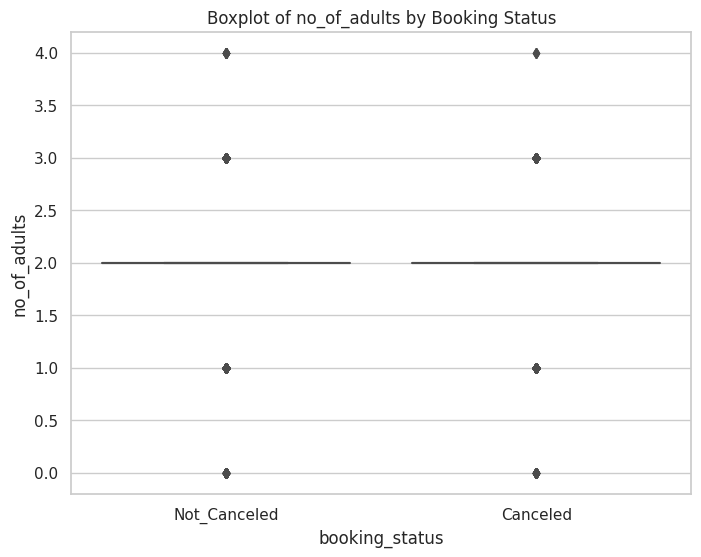

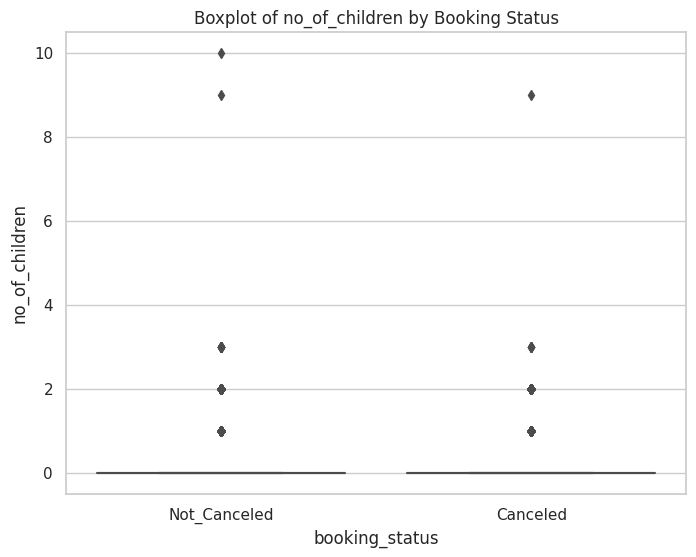

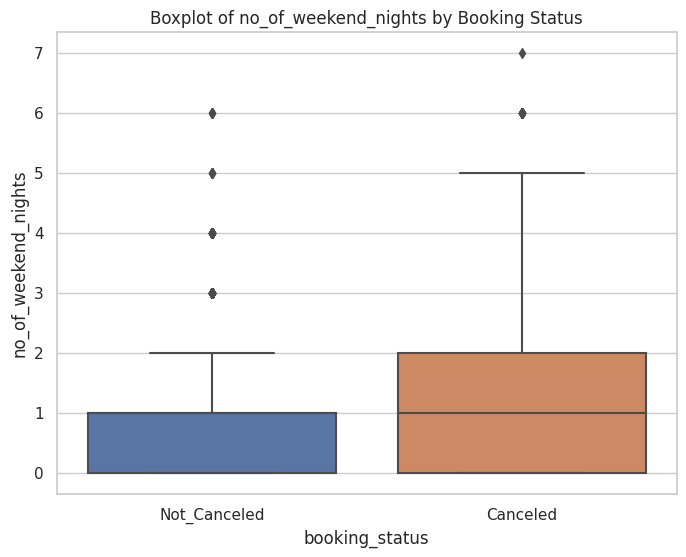

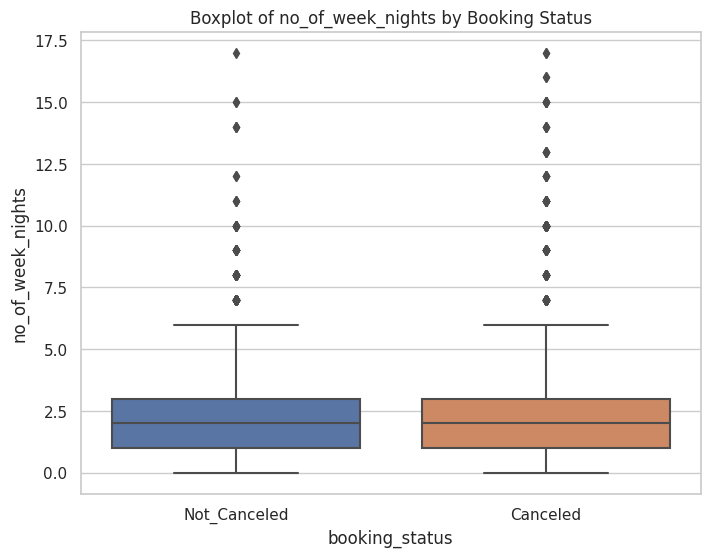

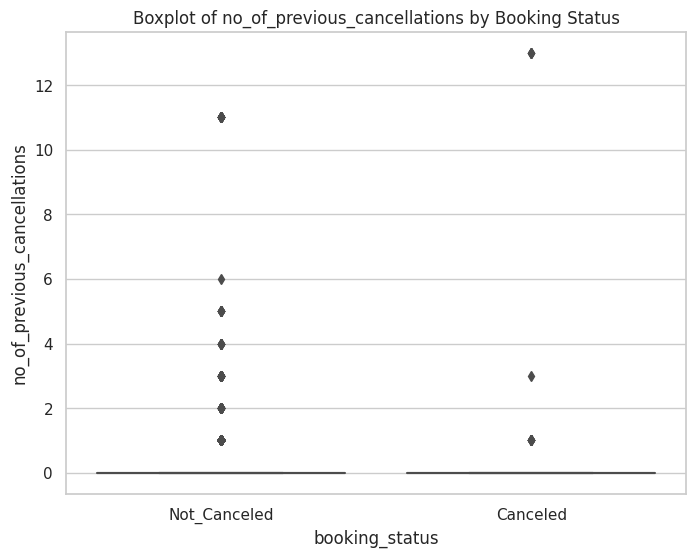

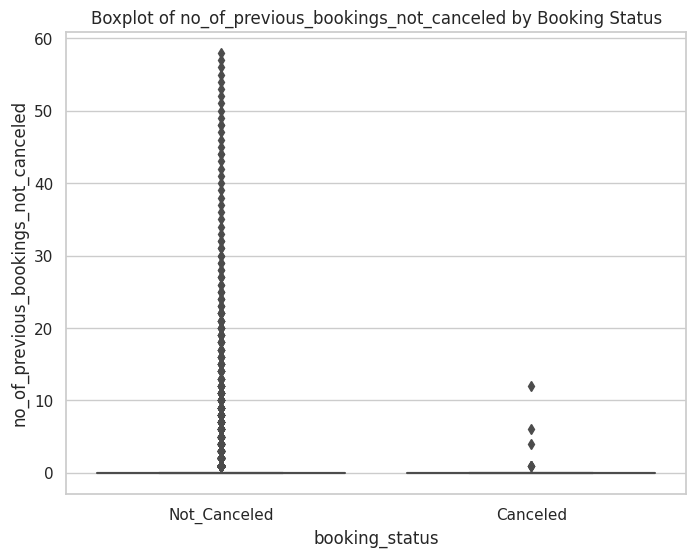

In [27]:
# List of numerical columns
num_cols = ['lead_time', 'avg_price_per_room', 'no_of_adults', 'no_of_children',
            'no_of_weekend_nights', 'no_of_week_nights',
            'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']

# Create boxplots for each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='booking_status', y=col, data=df)
    plt.title(f'Boxplot of {col} by Booking Status')
    plt.show()


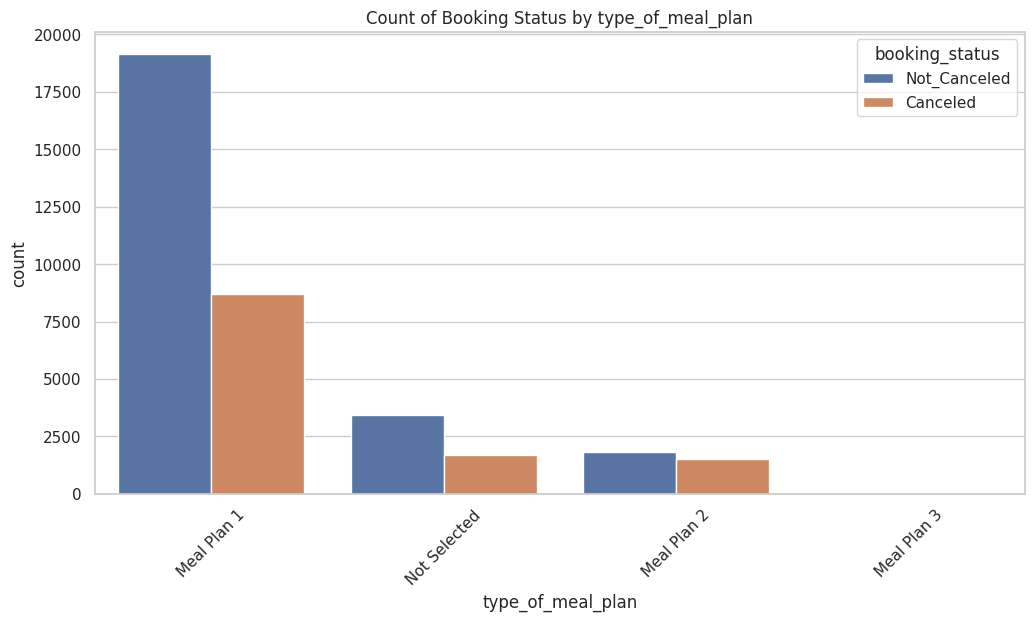

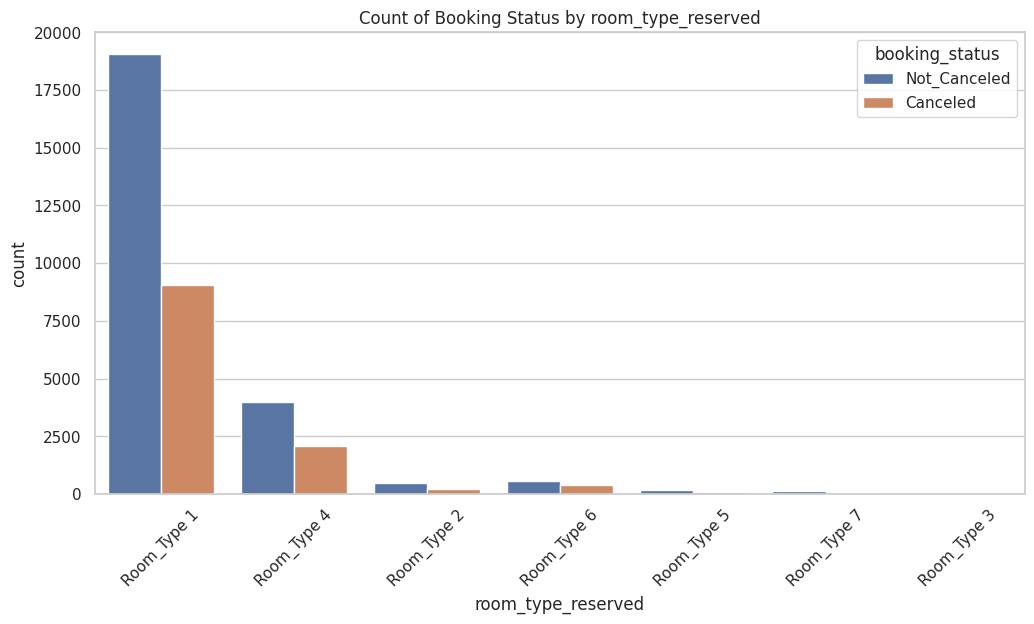

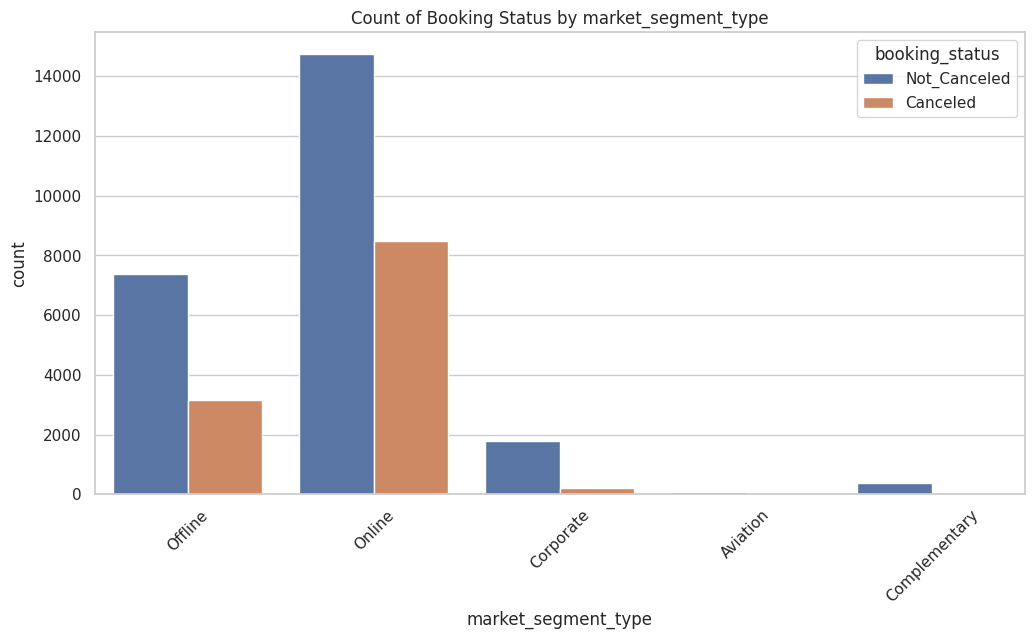

In [28]:
# List of categorical columns
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Create bar plots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='booking_status', data=df)
    plt.title(f'Count of Booking Status by {col}')
    plt.xticks(rotation=45)
    plt.show()


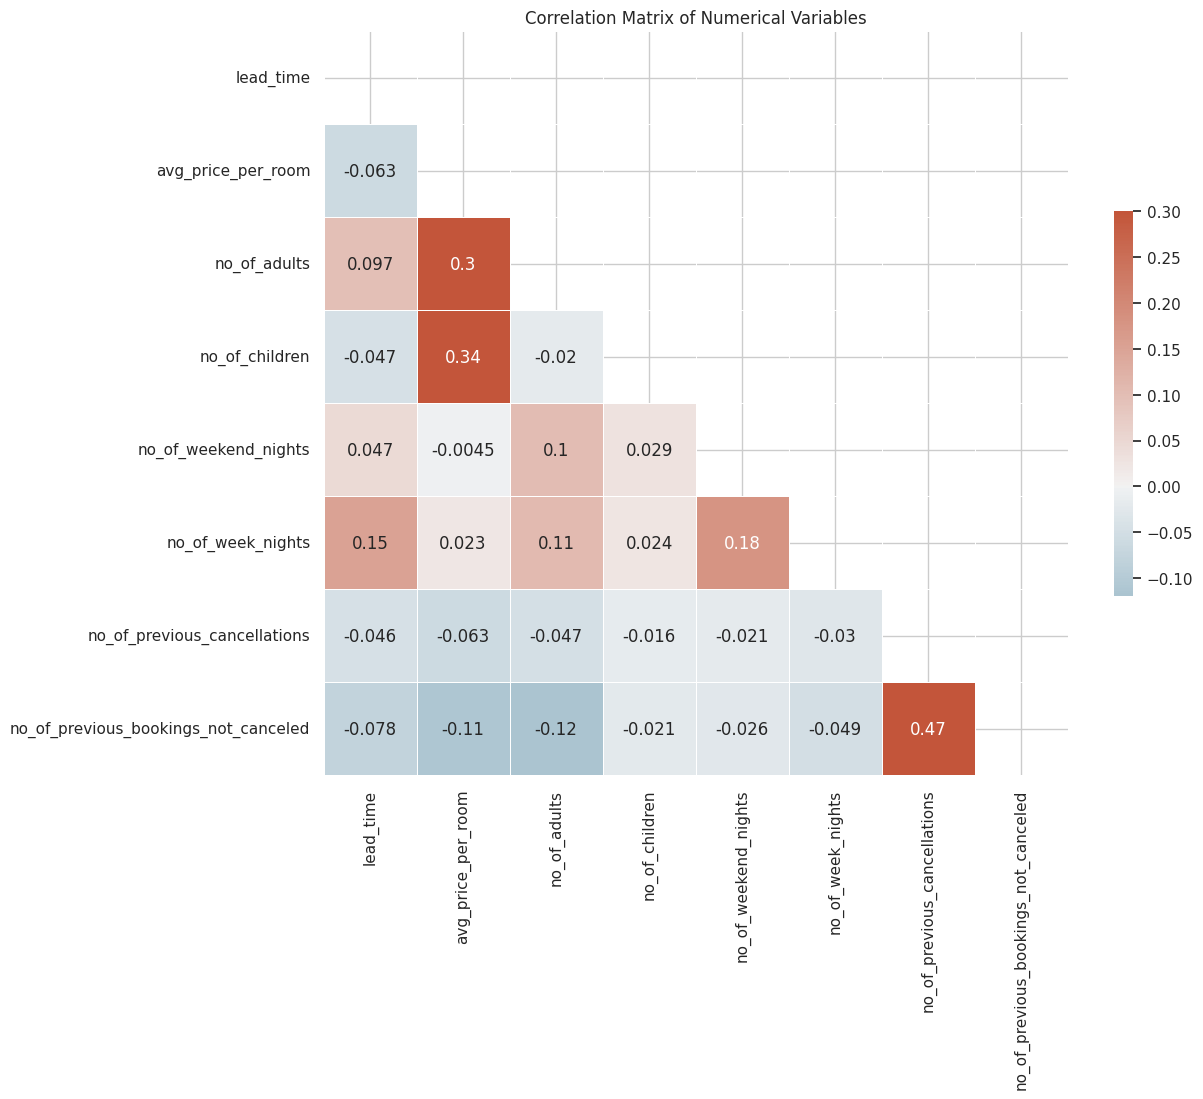

In [29]:
import numpy as np

# Compute the correlation matrix
corr = df[num_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# Fase 3: Preprocesamiento de los datos

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the target column
target_col = 'booking_status'

# Create a label encoder for the target column
le = LabelEncoder()

# Fit and transform the target column
df[target_col] = le.fit_transform(df[target_col])

# Get the list of categorical columns (excluding the target column)
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Create a column transformer for one-hot encoding
ct = ColumnTransformer([('encoder', OneHotEncoder(), cat_cols)], remainder='passthrough')

# Fit and transform the data
df_encoded = pd.DataFrame(ct.fit_transform(df))

# Get the list of new column names after one-hot encoding
new_cols = list(ct.named_transformers_['encoder'].get_feature_names_out(cat_cols)) + [col for col in df.columns if col not in cat_cols]

# Update the column names of the DataFrame
df_encoded.columns = new_cols

# Display the first few rows of the DataFrame
df_encoded.head()


,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,224,2017,10,2,0,0,0,65.0,0,1
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5,2018,11,6,0,0,0,106.68,1,1
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,2018,2,28,0,0,0,60.0,0,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,211,2018,5,20,0,0,0,100.0,0,0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,48,2018,4,11,0,0,0,94.5,0,0


In [31]:
from sklearn.preprocessing import StandardScaler

# Define the target variable and features
X = df_encoded.drop(columns=target_col)
y = df_encoded[target_col]

# List of numerical columns in X
num_cols_X = [col for col in num_cols if col in X.columns]

# Create a standard scaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns of X
scaler.fit(X[num_cols_X])

# Transform the numerical columns of X
X[num_cols_X] = scaler.transform(X[num_cols_X])

# Show the first few rows of X
X.head()


,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1.614896,2017,10,2,0,-0.063393,-0.087456,-1.095033,0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,-0.933701,2018,11,6,0,-0.063393,-0.087456,0.092806,1
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,-0.980250,2018,2,28,0,-0.063393,-0.087456,-1.237528,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1.463610,2018,5,20,0,-0.063393,-0.087456,-0.097567,0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,-0.433291,2018,4,11,0,-0.063393,-0.087456,-0.254312,0


In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the shapes of the training and test sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (29020, 31), (29020,)
Test set: (7255, 31), (7255,)


# Fase 4: Construcción del modelo

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)




In [ ]:
# Check the data types of the columns in X_train
X_train.dtypes


In [35]:
# Check the unique values in y_train
y_train.unique()


array([0, 1], dtype=object)

In [36]:
# Convert y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Train the model again
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Accuracy: 0.91
Recall: 0.95
Precision: 0.92
F1 Score: 0.93
ROC AUC: 0.89


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a new random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [42]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Make predictions on the test set using the model with the best parameters
y_pred_best = grid_search.predict(X_test)

# Calculate performance metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the performance metrics
print(f"\nPerformance metrics with best parameters:")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"ROC AUC: {roc_auc_best:.2f}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Performance metrics with best parameters:
Accuracy: 0.91
Recall: 0.95
Precision: 0.91
F1 Score: 0.93
ROC AUC: 0.88
